In [81]:
import numpy as np
from scipy.stats import kde
# Covariance matrices
cov_mats = {}
for i in range(1,4):
    cov_mats[i] = i * np.eye(2)
    
# mean vectors    
mu_vecs = {}
for i,j in zip(range(1,4), [[0,0], [3,0], [4,5]]):
    mu_vecs[i] = np.array(j).reshape(2,1)  

In [6]:
# Generating the random samples
all_samples = {}
for i in range(1,4):
    # generating 40x2 dimensional arrays with random Gaussian-distributed samples
    class_samples = np.random.multivariate_normal(mu_vecs[i].ravel(), cov_mats[i], 40)
    # adding class label to 3rd column
    class_samples = np.append(class_samples, np.zeros((40,1))+i, axis=1)
    all_samples[i] = class_samples

In [7]:
train_set = np.append(all_samples[1][0:20], all_samples[2][0:20], axis=0)
train_set = np.append(train_set, all_samples[3][0:20], axis=0)

test_set = np.append(all_samples[1][20:40], all_samples[2][20:40], axis=0)
test_set = np.append(test_set, all_samples[3][20:40], axis=0)

assert(train_set.shape == (60, 3))
assert(test_set.shape == (60, 3))

In [40]:
from sklearn import datasets , model_selection
classification_problem = datasets.make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=2, 
    n_classes=3, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3,
)

In [53]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1], 
    test_size=0.5,
    random_state=1,
)

In [55]:
tt_l=test_labels.reshape(50,-1)
tt_d = test_data
t_d.shape
tn_l=train_labels.reshape(50,-1)
tn_d = train_data
#np.concatenate((t_d, t_l),axis=1)

In [56]:
test_labels

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 2, 0])

In [57]:
test_set1 = np.concatenate((tt_d, tt_l),axis=1)
train_set1 = np.concatenate((tn_d, tn_l),axis=1)

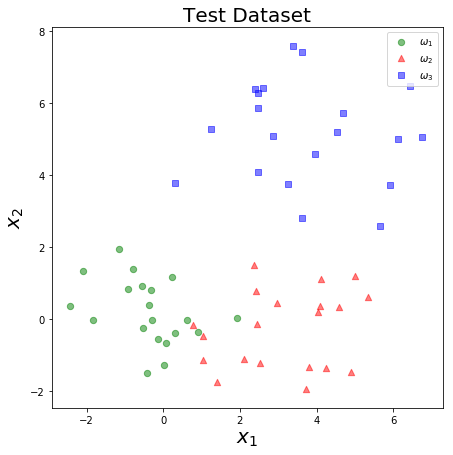

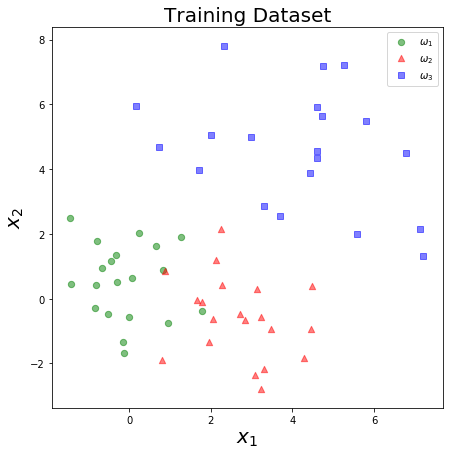

In [82]:
# Visualizing samples by plotting them in a scatter plot

#%pylab inline

import numpy as np
from matplotlib import pyplot as plt

for dset,title in zip((test_set, train_set), ['Test', 'Training']):
    f, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(dset[dset[:,2] == 1][:,0], dset[dset[:,2] == 1][:,1], \
           marker='o', color='green', s=40, alpha=0.5, label='$\omega_1$')
    ax.scatter(dset[dset[:,2] == 2][:,0], dset[dset[:,2] == 2][:,1], \
           marker='^', color='red', s=40, alpha=0.5, label='$\omega_2$')
    ax.scatter(dset[dset[:,2] == 3][:,0], dset[dset[:,2] == 3][:,1], \
           marker='s', color='blue', s=40, alpha=0.5, label='$\omega_3$')
    plt.legend(loc='upper right') 
    plt.title('{} Dataset'.format(title), size=20)
    plt.ylabel('$x_2$', size=20)
    plt.xlabel('$x_1$', size=20)
plt.show()

In [ ]:
mapped = zip((test_set, train_set), ['Test', 'Training'])
print(list(mapped))

In [ ]:
mapped = zip((test_set1, train_set1), ['Test', 'Training'])
print(list(mapped))

In [68]:
test_set.shape

(60, 3)

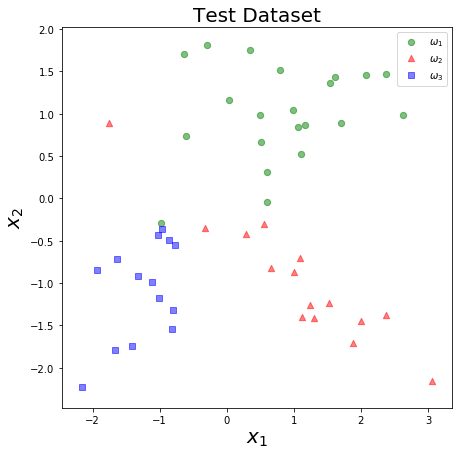

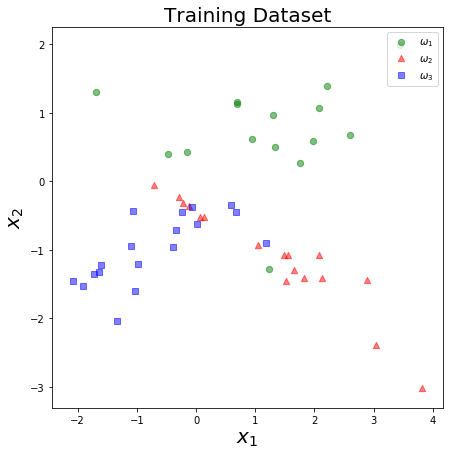

In [69]:

#%pylab inline

import numpy as np
from matplotlib import pyplot as plt


for dset,title in zip((test_set1, train_set1), ['Test', 'Training']):
    f, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(dset[dset[:,2] == 0][:,0], dset[dset[:,2] == 0][:,1], \
           marker='o', color='green', s=40, alpha=0.5, label='$\omega_1$')
    ax.scatter(dset[dset[:,2] == 1][:,0], dset[dset[:,2] == 1][:,1], \
           marker='^', color='red', s=40, alpha=0.5, label='$\omega_2$')
    ax.scatter(dset[dset[:,2] == 2][:,0], dset[dset[:,2] == 2][:,1], \
           marker='s', color='blue', s=40, alpha=0.5, label='$\omega_3$')
    plt.legend(loc='upper right') 
    plt.title('{} Dataset'.format(title), size=20)
    plt.ylabel('$x_2$', size=20)
    plt.xlabel('$x_1$', size=20)
plt.show()

In [98]:
class1_kde = kde.gaussian_kde(train_set[train_set[:,2] == 1].T[0:2], bw_method='scott')
class2_kde = kde.gaussian_kde(train_set[train_set[:,2] == 2].T[0:2], bw_method='scott')
class3_kde = kde.gaussian_kde(train_set[train_set[:,2] == 3].T[0:2], bw_method='scott')

In [79]:
test_set

array([[-2.08669156,  1.33531587,  1.        ],
       [ 0.00827345, -1.27190458,  1.        ],
       [-0.3265244 ,  0.80217669,  1.        ],
       [ 0.91234892, -0.34608771,  1.        ],
       [ 0.29396729, -0.37077361,  1.        ],
       [-0.12966271, -0.56009092,  1.        ],
       [-1.15853989,  1.94105098,  1.        ],
       [-1.844362  , -0.014332  ,  1.        ],
       [-0.5242271 , -0.24747033,  1.        ],
       [-0.78298746,  1.38865913,  1.        ],
       [-0.55085611,  0.91056189,  1.        ],
       [-0.42918231, -1.4927372 ,  1.        ],
       [-0.30177462, -0.02493596,  1.        ],
       [ 0.0788781 , -0.65530804,  1.        ],
       [ 0.62619614, -0.02965076,  1.        ],
       [-0.90901366,  0.83633709,  1.        ],
       [ 1.93525959,  0.03182047,  1.        ],
       [ 0.23832664,  1.15963364,  1.        ],
       [-0.3628889 ,  0.40265274,  1.        ],
       [-2.43287713,  0.37143725,  1.        ],
       [ 0.77585007, -0.15811099,  2.   

In [101]:
import operator
cl=1
p_vals1 = []
kdes = np.array([class1_kde, class2_kde,class3_kde])
#for row in test_set[test_set[:,-1] == cl][:,:-1]:
for kde in kdes:
    p_vals1.append(kde.evaluate(row))
max_index, max_value = max(enumerate(p_vals1), key=operator.itemgetter(1))
#return (max_value, max_index + 1)

In [102]:
p_vals1

[array([0.00281497]), array([0.03760692]), array([0.00324245])]

In [91]:
max_index, max_value

(10, array([0.12573763]))

In [93]:
import operator
cl=2
p_vals2 = []
kdes = []
#for row in test_set[test_set[:,-1] == cl][:,:-1]:
    p_vals2.append(class1_kde.evaluate(row))
max_index, max_value = max(enumerate(p_vals2), key=operator.itemgetter(1))
#return (max_value, max_index + 1)

In [94]:
p_vals2

[array([0.04238785]),
 array([0.01326341]),
 array([2.06617936e-07]),
 array([1.08243449e-13]),
 array([0.00910371]),
 array([0.00895319]),
 array([0.00487091]),
 array([3.7279591e-08]),
 array([2.81491487e-10]),
 array([0.00317497]),
 array([0.00058278]),
 array([3.11621402e-09]),
 array([7.94209743e-07]),
 array([1.5275374e-12]),
 array([7.80575899e-06]),
 array([3.06304847e-07]),
 array([0.03662507]),
 array([0.02787514]),
 array([4.21068504e-06]),
 array([0.00281497])]

In [95]:
max_index, max_value

(0, array([0.04238785]))

In [72]:
class1_kde1 = kde.gaussian_kde(train_set1[train_set1[:,2] == 0].T[0:2], bw_method='scott')